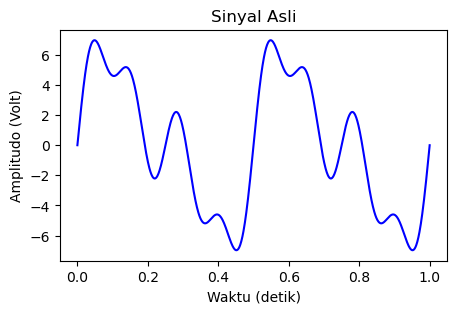

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def generate_signal(frequencies, amplitudes, t):
    signal = np.zeros_like(t)
    for f, A in zip(frequencies, amplitudes):
        signal += A * np.sin(2 * np.pi * f * t)
    return signal

frequencies = [2, 4, 8]  
amplitudes = [5, 3, 2]  
t = np.linspace(0, 1, 1000)  
signal_original = generate_signal(frequencies, amplitudes, t)

plt.figure(figsize=(5, 3))
plt.plot(t, signal_original, label='Sinyal Asli (Gabungan Sinus)', color='blue')
plt.title('Sinyal Asli')
plt.xlabel('Waktu (detik)')
plt.ylabel('Amplitudo (Volt)')
plt.show()


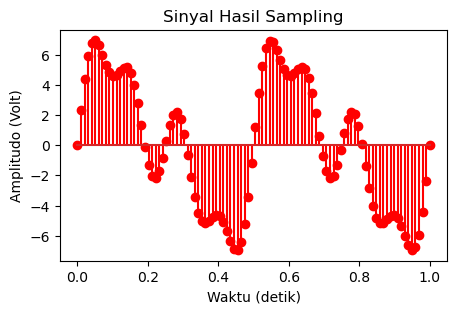

In [4]:
fs = 100  
t_sampled = np.linspace(0, 1, fs)  
signal_sampled = generate_signal(frequencies, amplitudes, t_sampled)
    
# Plot sinyal sampling
plt.figure(figsize=(5,3))
plt.stem(t_sampled, signal_sampled, label='Sinyal Sampling (100 Hz)', linefmt='r-')
plt.title('Sinyal Hasil Sampling')
plt.xlabel('Waktu (detik)')
plt.ylabel('Amplitudo (Volt)')
plt.show()


Contoh Encoding Biner (16-bit):
Level Kuantisasi: 32767.00 -> Encoding Biner: 0111111111111111
Level Kuantisasi: 43867.00 -> Encoding Biner: 1010101101011011
Level Kuantisasi: 53537.00 -> Encoding Biner: 1101000100100001
Level Kuantisasi: 60655.00 -> Encoding Biner: 1110110011101111
Level Kuantisasi: 64635.00 -> Encoding Biner: 1111110001111011
Level Kuantisasi: 65535.00 -> Encoding Biner: 1111111111111111
Level Kuantisasi: 64000.00 -> Encoding Biner: 1111101000000000
Level Kuantisasi: 61074.00 -> Encoding Biner: 1110111010010010
Level Kuantisasi: 57920.00 -> Encoding Biner: 1110001001000000
Level Kuantisasi: 55523.00 -> Encoding Biner: 1101100011100011


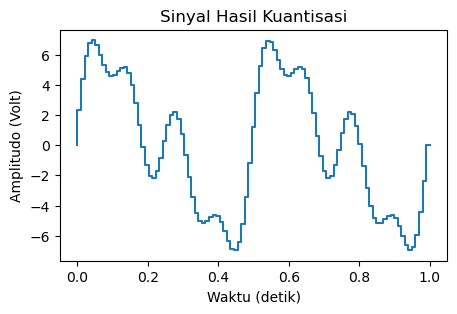

In [114]:
num_bits = 16
q_levels = 2 ** num_bits 
V_min = np.min(signal_sampled)
V_max = np.max(signal_sampled) 
quantization_step = (V_max - V_min) / q_levels

signal_quantized = quantization_step * np.round(signal_sampled / quantization_step)
signal_quantized_level = ((signal_quantized - V_min) / quantization_step) -1

def pcm_encoding(signal, num_bits):
    encoded_signal = []
    for sample in signal:
        encoded_signal.append(format(int(sample), f'0{num_bits}b'))
    return encoded_signal

pcm_encoded_signal = pcm_encoding(signal_quantized_level, num_bits)

print("Contoh Encoding Biner (16-bit):")
for i in range(10):
    print(f"Level Kuantisasi: {signal_quantized_level[i]:.2f} -> Encoding Biner: {pcm_encoded_signal[i]}")

plt.figure(figsize=(5,3))
plt.step(t_sampled, signal_quantized, label='Sinyal Kuantisasi (16-bit)')
plt.title('Sinyal Hasil Kuantisasi')
plt.xlabel('Waktu (detik)')
plt.ylabel('Amplitudo (Volt)')
plt.show()
